
Esta é uma análise exploratória de dados sobre prisões por crimes de colarinho branco, fornecidos pela Coordenação de Repressão à Corrupção (CRC), órgão da Polícia Federal, por meio da Lei de Acesso à Informação e analisados pela agência [Fiquem Sabendo](https://fiquemsabendo.com.br/). As informações agregam crimes de corrupção, organização criminosa, peculato, crimes de licitação, tráfico de influência, entre outros. Foram considerados somente os meses de janeiro a setembro de cada ano, já que o CRC não informou as estatísticas dos últimos três meses de 2021. Mais detalhes podem ser vistos na [newsletter](https://fiquemsabendo.substack.com/) da agência Fiquem Sabendo em que os dados foram divulgados.

## Organizando os dados

In [1]:
#pacotes necessários
import pandas as pd
from plotnine import *

/Users/luizfernandotoledo/.pyenv/versions/3.9.7/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [11]:
#abrindo os dados
df = pd.read_csv("prisoes.csv", sep=';', encoding='latin-1')
pd.set_option('display.max_rows', 1000000)

In [15]:
# arrumando a coluna de data
df.dt_deflagracao = pd.to_datetime(df.dt_deflagracao)

In [32]:
#criando uma nova coluna que soma mandados de prisão preventiva (mpp), temporária (mpt) e flagrantes
df['total_prisoes'] = (df.nr_mpp + df.nr_mpt + df.nr_flagrante)

In [42]:
#criar uma coluna nova somente com os meses
df['mes'] = pd.DatetimeIndex(df['dt_deflagracao']).month
df.head()

,sg_uf,nm_operacao,dt_deflagracao,ano,sg_unidade,nr_mpp,nr_mpt,nr_flagrante,total_prisoes,mes
0,RJ,TELHADO DE VIDRO,2008-03-11,2008,SR/PF/RJ,13,0,0,13,3
1,MA,RAPINA II,2008-04-02,2008,SR/PF/MA,13,0,0,13,4
2,MG,PARSÁGADA,2008-04-09,2008,SR/PF/MG,50,0,0,50,4
3,MT,TERMES,2008-04-29,2008,SR/PF/MT,0,64,0,64,4
4,MA,NÊMESIS,2008-05-09,2008,SR/PF/MA,5,0,0,5,5


In [60]:
# total de prisões por Estado de 2008 a 2021
df.groupby(by='sg_uf').total_prisoes.sum().sort_values(ascending=False)

sg_uf
MG      541
PR      534
RJ      447
SP      356
BA      267
PA      261
MT      255
PB      238
MS      226
RO      220
MA      208
AM      155
TO      151
RS      146
AP      145
PE      135
CE      134
DF      120
AL      120
PI       99
AC       83
SC       72
RR       70
ES       69
GO       59
UC       55
SE       34
RN       27
SEDE      1
Name: total_prisoes, dtype: int64

## Filtro: como os dados de 2021 estão incompletos, vamos analisar somente as prisões de janeiro a setembro para cada ano ao invés do ano todo

In [89]:
# removendo os meses de outubro (10), novembro (11) e dezembro (12) dos dados
df_jan_a_set = df[df.mes < 10]

In [90]:
# total de prisões de janeiro a setembro por ano

df_jan_a_set.groupby(by='ano').total_prisoes.sum()

ano
2008    320
2009    187
2010    207
2011    314
2012    226
2013    223
2014    174
2015    179
2016    367
2017    332
2018    422
2019    327
2020    256
2021    143
Name: total_prisoes, dtype: int64

<AxesSubplot:xlabel='ano'>

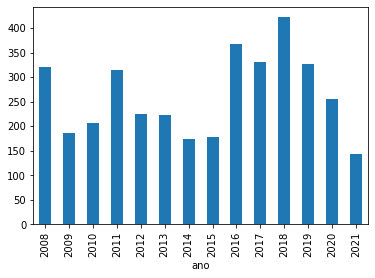

In [91]:
# total de prisões de janeiro a setembro por ano, em gráfico
df_jan_a_set.groupby(by='ano').total_prisoes.sum().plot(kind='bar')

/Users/luizfernandotoledo/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/facets/facet.py:390: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.
/Users/luizfernandotoledo/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/geoms/geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


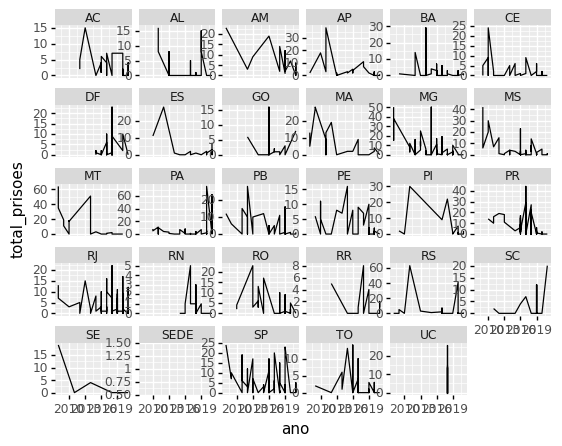

<ggplot: (681838059)>

In [92]:
#série histórica por UF
(
    ggplot(df_filtrado,          
        aes('ano', 'total_prisoes')) 
        + geom_line()      
        + facet_wrap('sg_uf', scales = "free_y")

)